# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
#Import your libraries here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import pandas as pd
import time
import math

In [8]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
from sklearn.mixture import GaussianMixture as GM
from matplotlib.pyplot import figure

In [9]:
#Load the dataset and explore its variables
data = pd.read_csv('./snsdata.csv')

In [10]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [11]:
data.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [12]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gradyear,30000.0,2007.500000,1.118053,2006.000,2006.750,2007.500,2008.250,2009.000
age,24914.0,17.993950,7.858054,3.086,16.312,17.287,18.259,106.927
friends,30000.0,30.179467,36.530877,0.000,3.000,20.000,44.000,830.000
basketball,30000.0,0.267333,0.804708,0.000,0.000,0.000,0.000,24.000
football,30000.0,0.252300,0.705357,0.000,0.000,0.000,0.000,15.000
soccer,30000.0,0.222767,0.917226,0.000,0.000,0.000,0.000,27.000
softball,30000.0,0.161200,0.739707,0.000,0.000,0.000,0.000,17.000
volleyball,30000.0,0.143133,0.639943,0.000,0.000,0.000,0.000,14.000
swimming,30000.0,0.134400,0.516990,0.000,0.000,0.000,0.000,31.000
cheerleading,30000.0,0.106633,0.514333,0.000,0.000,0.000,0.000,9.000


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [15]:
#Your code here:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [16]:
data.age.value_counts()

17.443     36
16.438     32
17.550     31
17.399     31
17.626     31
           ..
19.639      1
22.705      1
82.609      1
105.832     1
106.891     1
Name: age, Length: 2214, dtype: int64

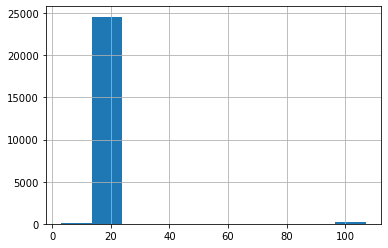

In [21]:
data.age.hist(bins=10)

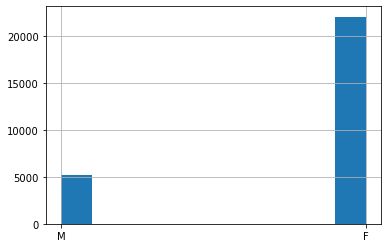

In [22]:
data.gender.hist()

NameError: name 'Null' is not defined

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

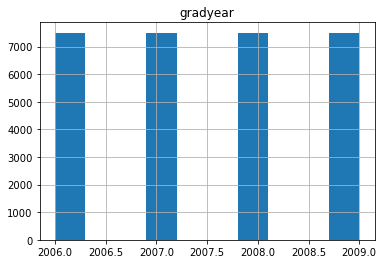

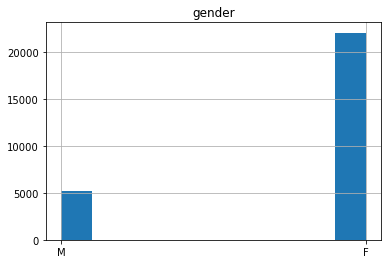

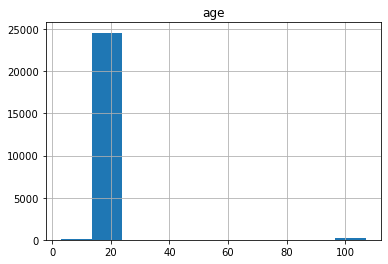

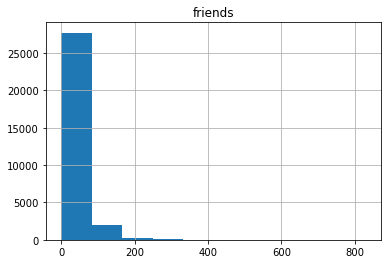

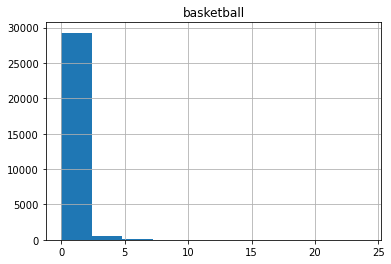

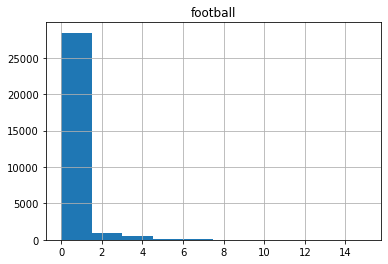

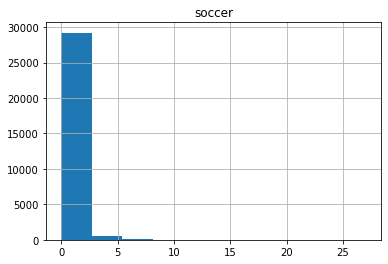

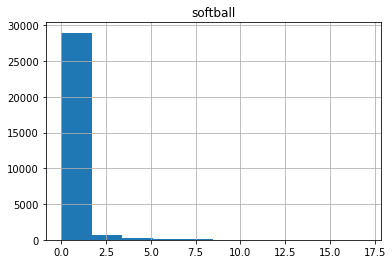

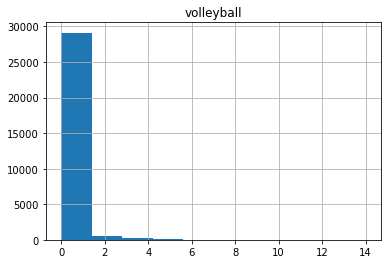

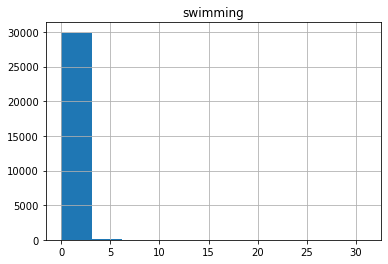

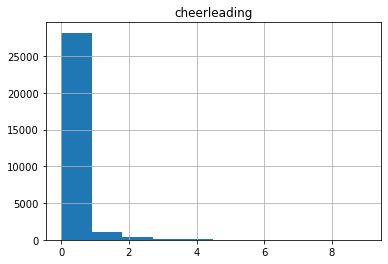

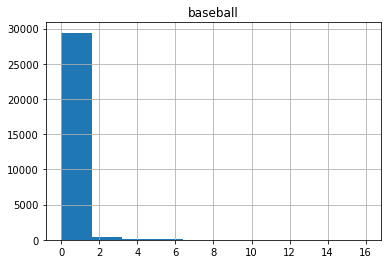

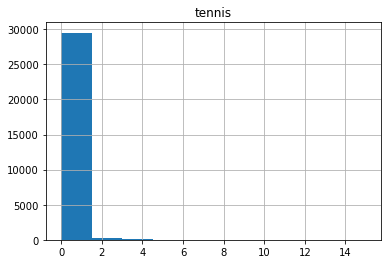

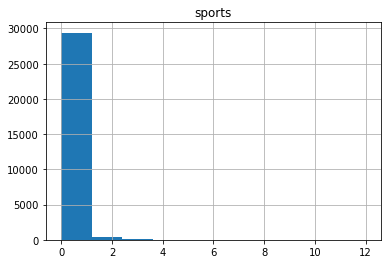

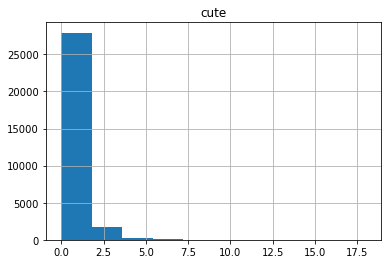

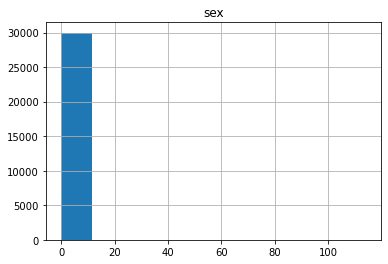

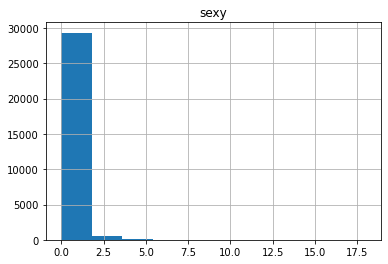

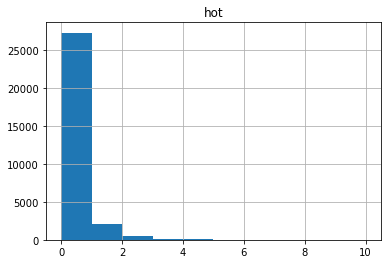

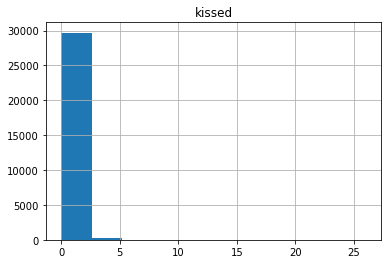

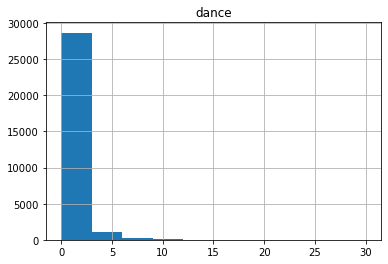

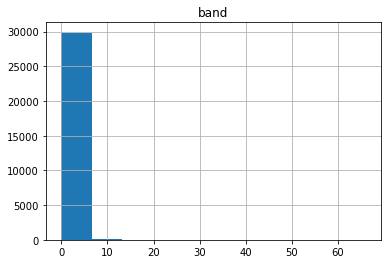

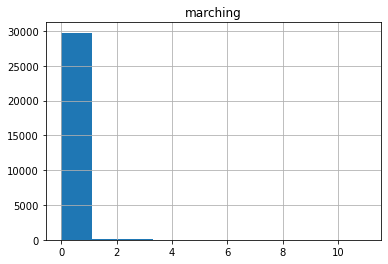

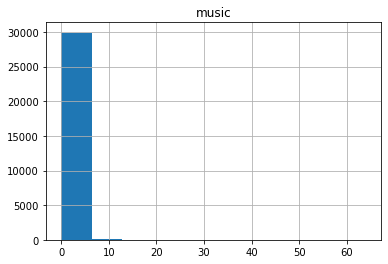

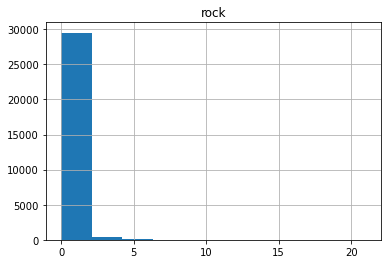

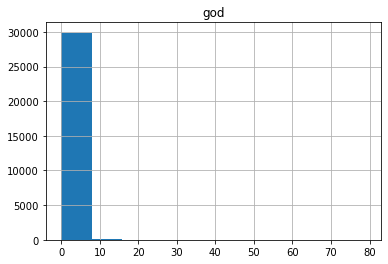

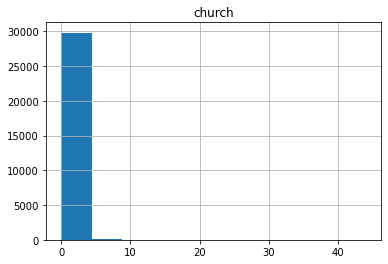

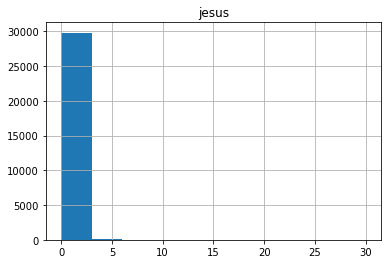

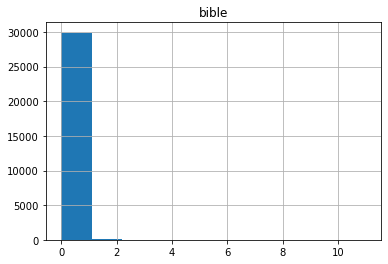

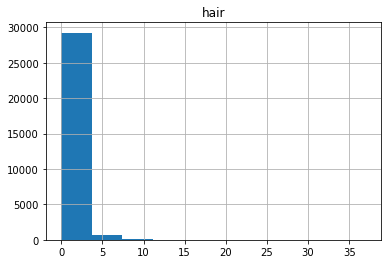

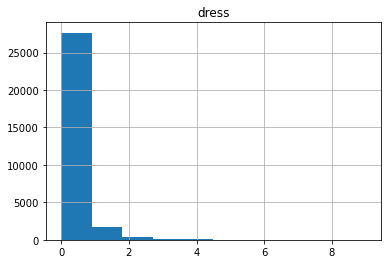

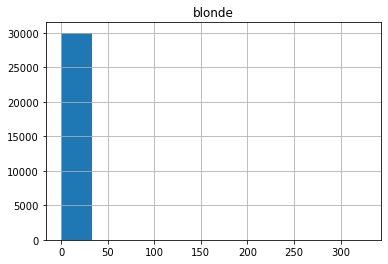

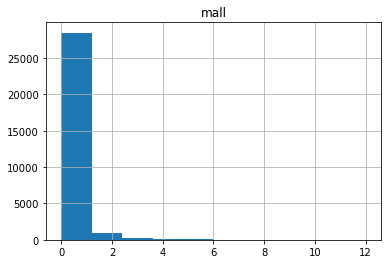

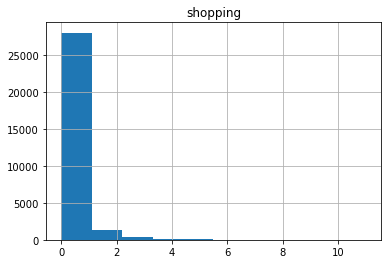

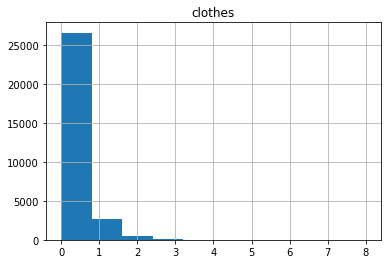

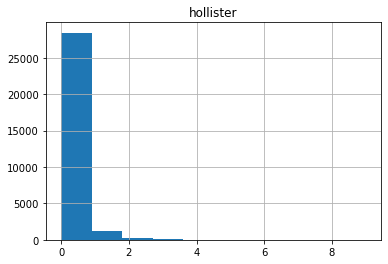

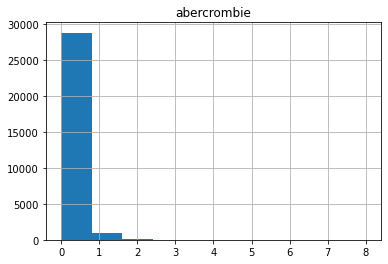

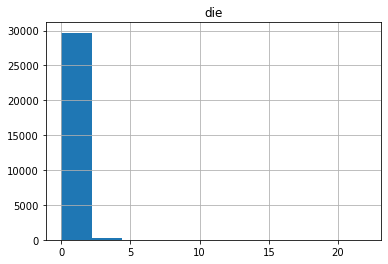

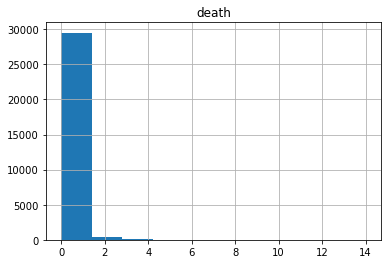

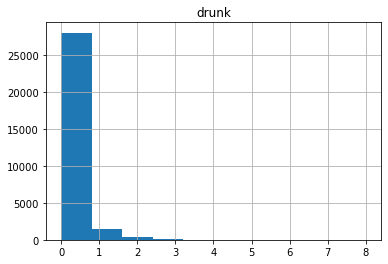

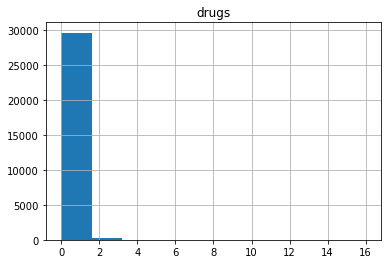

In [24]:
#Your code here:
for columns in data.columns:
    data[columns].hist(bins=10)
    plt.title(columns)
    plt.show()


## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [ ]:
#Your code here:




## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [ ]:
#Your code here:


